In [2]:
query = "RawAfterMania"

In [4]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 8.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    print(vars(tweet))
    break

{'url': 'https://twitter.com/rbf_bleek/status/1643435404463427584', 'date': datetime.datetime(2023, 4, 5, 2, 8, 28, tzinfo=datetime.timezone.utc), 'rawContent': "S/o to Shawn for making tonight's #NXT leagues better than that train wreck #RawAfterMania. I know he got me", 'renderedContent': "S/o to Shawn for making tonight's #NXT leagues better than that train wreck #RawAfterMania. I know he got me", 'id': 1643435404463427584, 'user': User(username='rbf_bleek', id=1583593194599682050, displayname='ᏰᏝᏋᏋᏦ', rawDescription='22M | Eng/日本語| talks sometimes | Horror/Art Fiend | Wrestling/Video Game Fan | in a few fandoms |', renderedDescription='22M | Eng/日本語| talks sometimes | Horror/Art Fiend | Wrestling/Video Game Fan | in a few fandoms |', descriptionLinks=None, verified=False, created=datetime.datetime(2022, 10, 21, 22, 57, 18, tzinfo=datetime.timezone.utc), followersCount=9, friendsCount=106, statusesCount=1442, favouritesCount=11905, listedCount=0, mediaCount=0, location='', protected

In [8]:
limit = 10000
tweets = []

In [9]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])

<ipython-input-9-0ab442d292c0>:5: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])


In [10]:
df = pd.DataFrame(tweets, columns = ['Date','User','Tweet', 'Number of Likes'])

In [11]:
df.to_csv('Raw After WrestleMania tweets')

In [11]:
df.head()

,Date,User,Tweet,Number of Likes
0,2023-04-05 02:08:28+00:00,rbf_bleek,S/o to Shawn for making tonight's #NXT leagues...,0
1,2023-04-05 02:08:20+00:00,ericjustin81,#NXT After #NXTStandAndDeliver &gt;&gt;&gt; #R...,0
2,2023-04-05 02:08:16+00:00,JoeMungel1977,Tonight’s episode of @WWENXT after Stand and D...,0
3,2023-04-05 02:06:13+00:00,ScottsScoop44,That is how you put on a post-WrestleMania sho...,0
4,2023-04-05 02:04:55+00:00,JayBizzNY,@TripleH &amp; @StephMcMahon need to start the...,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             10000 non-null  datetime64[ns, UTC]
 1   User             10000 non-null  object             
 2   Tweet            10000 non-null  object             
 3   Number of Likes  10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 312.6+ KB


In [19]:
df['Number of Likes'].unique()

array([    0,     2,     1,     3,     9,    13,    18,     6,     5,
           8,     4,    20,    25,    23,    10,    37,    15,    56,
          35,    51,    17,    83,    67,    14,    26,    22,    21,
          31,    50,    48,    32,    11,   109,   792,    12,     7,
          16,    54,  6358,   276,    27,  2547,    68,    53,    28,
          36,   403,    80,   783,    69,    64,   131,    34,    19,
          47,    39,    79,   226,   190,   420,    38,   468,    76,
          29,   129,   266,    49,   814,    66,    40,   106,   192,
         160,  2063,   491,   135,   801,   178,   134,    73,    24,
          55,   335,    65,   170,   126,   156,    43,   127,    92,
          33,  1502,   448,    30,   870,  3033,    96,   141,    93,
        3190,   351,  5052,   364,   720,   133,    63,   762,    44,
         253,   227,   634,    61,   672,   377, 10479,  1172,   224,
         137,   236,    57,   436,  1495, 11337,   120,   268,   230,
         788,   228,

In [20]:
df['Number of Likes'].value_counts()

0      5032
1      2400
2      1099
3       454
4       253
       ... 
170       1
65        1
335       1
55        1
112       1
Name: Number of Likes, Length: 170, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [13]:
train = df.sample(frac = 0.7)

In [14]:
test = df.drop(train.index)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 2748 to 3413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             7000 non-null   datetime64[ns, UTC]
 1   User             7000 non-null   object             
 2   Tweet            7000 non-null   object             
 3   Number of Likes  7000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 273.4+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             3000 non-null   datetime64[ns, UTC]
 1   User             3000 non-null   object             
 2   Tweet            3000 non-null   object             
 3   Number of Likes  3000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 117.2+ KB


In [18]:
import re

In [21]:
# Extract hashtags, mentions, and links from each tweet in the DataFrame
# Add new collumns to our dataset

def find_hashtags(tweet):  
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    
    df['hashtags'] = df['Tweet'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['Tweet'].apply(lambda x: find_mentions(x))
    df['links'] = df['Tweet'].apply(lambda x: find_links(x))
    df['text_clean'] = df['Tweet'].apply(lambda x: clean_text(x))
    
    return df
    
train = process_text(train)
test = process_text(test)
#Our train dataset after process text operation
train.head()

,Date,User,Tweet,Number of Likes,hashtags,mentions,links,text_clean
2748,2023-04-04 09:32:08+00:00,burnwater,@davesimonmma They’re saying VKM booked #RawAf...,0,RawAfterMania,davesimonmma,no,@davesimonmma They’re saying VKM booked #RawAf...
2464,2023-04-04 11:00:20+00:00,luisizon94,Lo unico interesante del #RawAfterMania la vic...,0,RawAfterMania,no,no,Lo unico interesante del #RawAfterMania la vic...
1039,2023-04-04 17:17:57+00:00,TheRomanRTheGuy,It's the smile you can never get enough with #...,46,TheGreatestToEverDoIt RomanReigns RawAfterMani...,no,https://t.co/dvqClnQzpL,It's the smile you can never get enough with #...
1462,2023-04-04 15:04:05+00:00,iRickyRana,That moment when brock turned heel on Cody…out...,5,RawAfterMania rawafterwrestlemania WWE WWERaw,no,https://t.co/TVYiDMzjGY,That moment when brock turned heel on Cody…out...
4643,2023-04-04 03:41:25+00:00,richard93612,#WWE\n#WWEEspañol\n#WWERaw \n#RawAfterMania \n...,2,WWE WWEEspañol WWERaw RawAfterMania Wrestlemania,MarceloAtWWE JerrySotoNarra TripleH WWE VinceM...,https://t.co/DQ76302ANk,#WWE #WWEEspañol #WWERaw #RawAfterMania @Marce...


In [19]:
# Making a 'clean' text column, removing links and unnecessary white spaces
import re
#the string of text located at row 450 in the 'text' column 
test_str = train.loc[4500, 'Tweet']

def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # Remove link
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text = re.sub('\s+', ' ', text).strip() # Remove leading, trailing, and extra spaces
    return text




In [20]:
#The function is applied to the example row in the 'text' column of our dataset.
print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: Man @EPWShow and @Hubb_Wrestling told no lies tonight on clash of the podcasts.  #RawAfterMania
Cleaned text: Man @EPWShow and @Hubb_Wrestling told no lies tonight on clash of the podcasts. #RawAfterMania


In [22]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.4 MB/s eta 0:00:00


In [144]:
#remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in wordcloud.STOPWORDS])


In [24]:
def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

In [25]:
#check strip_all_entities functionality
strip_all_entities('@shawn Titanic #tragedy could have been prevented Economic \
                   Times: Telegraph.co.ukTitanic tragedy could have been preve... http://bet.ly/tuN2wx')

'Titanic tragedy could have been prevented Economic Times Telegraph co ukTitanic tragedy could have been preve'

In [26]:
#install autocorrect
!pip install autocorrect
from autocorrect import Speller 

#create function to spell check strings
def spell_check(x):
    spell = Speller(lang='en')
    return " ".join([spell(i) for i in x.split()])

#showcase spellcheck 
mispelled = 'Pleaze spelcheck this sentince'
spell_check(mispelled)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=368c76802af887c2d9c46544340cf4aaf1141576f619052c50e6330fa5c9c9f5
  Stored in directory: /root/.cache/pip/wheels/ab/0f/23/3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect


'Please spelcheck this sentence'

In [27]:
PROCESS_TWEETS = False
if PROCESS_TWEETS:
    #apply all of above functions
    df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())
    df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x, flags = re.MULTILINE))
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    df['Tweet'] = df['Tweet'].apply(spell_check)

In [28]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, s)

expand_contractions("can't stop won't stop")

'cannot stop will not stop'

In [29]:
#apply to whole text column
df['Tweet'] = df['Tweet'].apply(expand_contractions)

In [30]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Tweet'] = df['Tweet'].apply(remove_special_characters)

In [31]:
def remove_panctuation(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Tweet'] = df['Tweet'].apply(remove_special_characters)

In [32]:
tweets = [tweet for tweet in df['Tweet']]

#split data to update changes
tr = df[:len(train)]
ts = df[len(train):]

In [33]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             7000 non-null   datetime64[ns, UTC]
 1   User             7000 non-null   object             
 2   Tweet            7000 non-null   object             
 3   Number of Likes  7000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 218.9+ KB


In [34]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 7000 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             3000 non-null   datetime64[ns, UTC]
 1   User             3000 non-null   object             
 2   Tweet            3000 non-null   object             
 3   Number of Likes  3000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 93.9+ KB


In [35]:
tweets

['So to Shawn for making tonights NXT leagues better than that train wreck RawAfterMania I know he got me',
 'NXT After NXTStandAndDeliver gtgtgt RawAfterMania',
 'Tonights episode of WWENXT after Stand and Deliver was exciting It was even more exciting then last nights Raw after Mania Hopefully Smackdown on Friday will be exciting WWE WWENXT NXTAfterStandAndDeliver WWERaw RawAfterMania SmackDown SmackdownAfterMania',
 'That is how you put on a postWrestleMania show NXT tonight was topnotch and was just downright incredible We got returns and we are getting 3 debuts we also got fresh new rivalries and some great wrestling where was this last night on Raw\n\nWWERaw RawAfterMania WWENXT',
 'TripleH amp StephMcMahon need to start their own Wrestling promotion That was the worst RawAfterMania Ever amp you could tell Morale is already going down in WWE',
 'Get 20 off of your first ticket purchase at SeatGeek Use code SKEWCAR at checkout\n\nhttpstcoWHftctkIyG\n\nNASCAR IndyCar IMSA F1 Formul

In [110]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in wordcloud.STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [93]:
###################################################
#### Unigrams
###################################################


In [111]:
from collections import defaultdict
import wordcloud

In [112]:
unigrams = defaultdict(int)
for word in df['Tweet']:
    for word in generate_ngrams(word, n_gram = 1):
        unigrams[word] += 1
unigrams = pd.DataFrame(sorted(unigrams.items(), key=lambda x: x[1])[::-3])

In [113]:
unigrams = unigrams[1:]

In [114]:
unigrams

,0,1
1,cody,1715
2,raw,1086
3,show,728
4,night,591
5,one,516
...,...,...
6579,4423,1
6580,taylorswift taylorswifttix,1
6581,14th\nits,1
6582,stadium,1


In [115]:
u = [t for t in unigrams[0] if len(unigrams[0])>3]

In [141]:
unigrams['text_length'] = len(unigrams[0])

In [142]:
unigrams

,0,1,text_length
1,cody,1715,6583
2,raw,1086,6583
3,show,728,6583
4,night,591,6583
5,one,516,6583
...,...,...,...
6579,4423,1,6583
6580,taylorswift taylorswifttix,1,6583
6581,14th\nits,1,6583
6582,stadium,1,6583


In [65]:
###################################################
#### Bigrams
###################################################

In [60]:
bigrams = defaultdict(int)
for word in df['Tweet']:
    for word in generate_ngrams(word, n_gram = 2):
        bigrams[word] += 1
biggrams = pd.DataFrame(sorted(bigrams.items(), key=lambda x: x[1])[::-2])

In [66]:
###################################################
#### Trigrams
###################################################

In [40]:
trigrams = defaultdict(int)
for word in df['Tweet']:
    for word in generate_ngrams(word, n_gram = 3):
        trigrams[word] += 1
triggrams = pd.DataFrame(sorted(trigrams.items(), key=lambda x: x[1])[::-1])

In [68]:
###################################################
#### 4-grams
###################################################

In [41]:
fourgrams = defaultdict(int)
for word in df['Tweet']:
    for word in generate_ngrams(word, n_gram = 4):
        fourgrams[word] += 1
fourggrams = pd.DataFrame(sorted(fourgrams.items(), key=lambda x: x[1])[::-1])

<Axes: >

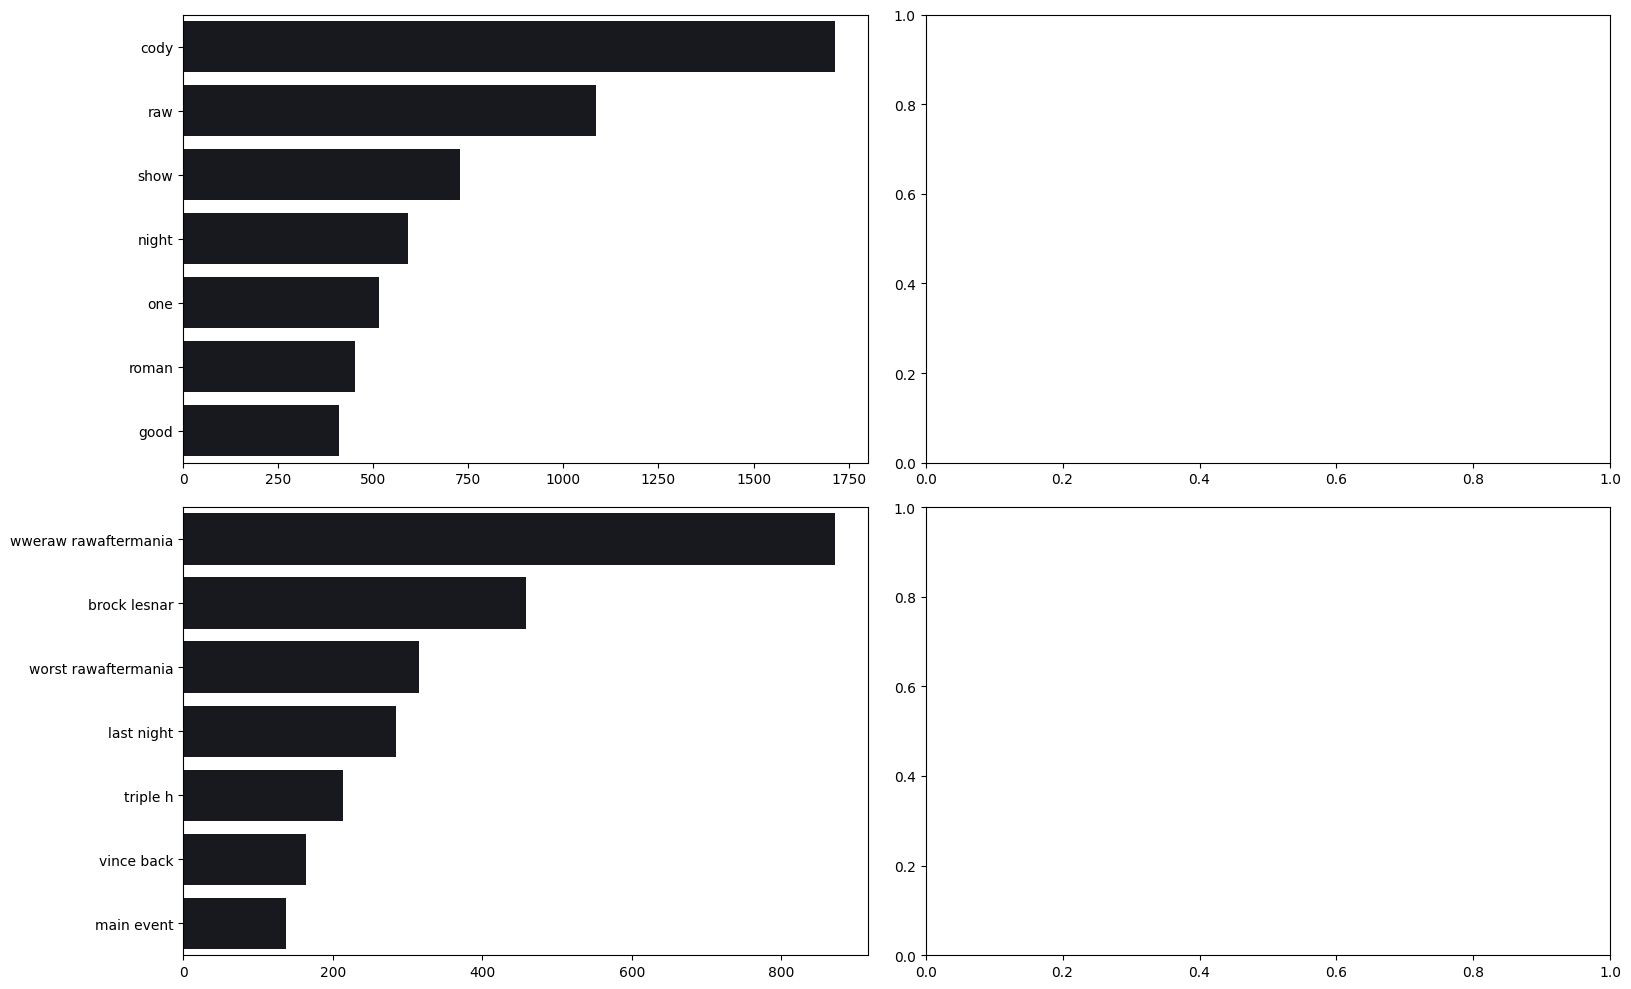

In [106]:
N = 7

fig, ax = plt.subplots(2,2, figsize = (15, 10))
plt.tight_layout()

sns.barplot(y = unigrams[0].values[:N], x = unigrams[1].values[:N], ax = ax[0, 0], color='#171820')

sns.barplot(y = biggrams[0].values[:N], x = biggrams[1].values[:N], ax = ax[1, 0], color='#171820')





In [74]:
from wordcloud import STOPWORDS

def create_stat(df):
    # Tweet length
    df['text_len'] = df['text_clean'].apply(len)
    # Word count
    df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split()))
    # Stopword count
    df['stop_word_count'] = df['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    # Count of hashtags (#)
    df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split()))
    
    # Count of mentions (@)
    df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split()))
    # Count of links
    df['link_count'] = df['links'].apply(lambda x: len(str(x).split()))
    # Count of uppercase letters
    df['caps_count'] = df['text_clean'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
    # Ratio of uppercase letters
    df['caps_ratio'] = df['caps_count'] / df['text_len']
    return df

train = create_stat(train)
test = create_stat(test)

print(train.shape, test.shape)

(7000, 16) (3000, 16)


In [75]:
from nltk import FreqDist, word_tokenize

# Make a set of stop words
stopwords = set(STOPWORDS)

In [79]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

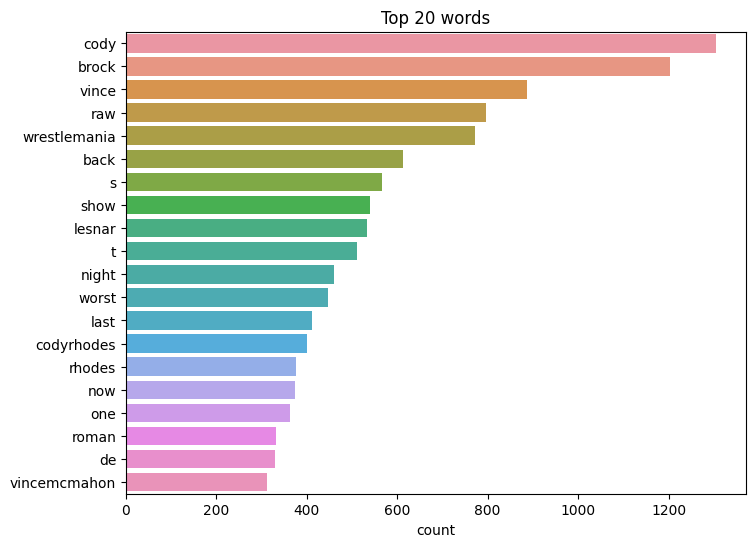

In [83]:
# Calculation of the frequency distribution of unigrams (single words) 
# in the "text_clean" column of the "train" dataset
word_freq = FreqDist(w for w in word_tokenize(' '.join(train['text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))

#Creation a DataFrame from the frequency distribution and selects the top 20 most common words
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(23)[3:23]

#Creation a bar plot of the top 20 words using the Seaborn library
plt.figure(figsize=(8,6))
sns.barplot(x='count', y=top20w.index, data=top20w)
plt.title('Top 20 words')
plt.show()